# 📊 Case Study: Loyalty Points Analysis for a Real-Money Gaming Platform



### 🔍 Project Overview




The objective is to analyze user activity on an online real-money gaming platform and compute **Loyalty Points** for each user based on their engagement and transactions.


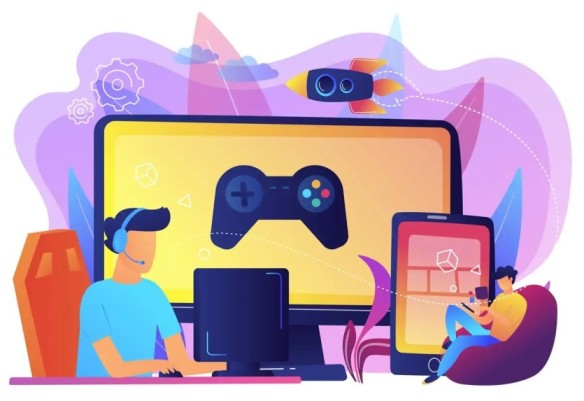

### 🎯 Goals of the Assignment

- Clean and prepare the gameplay, deposit, and withdrawal data.
- Aggregate data per user to calculate:
  - Total deposit and withdrawal amounts
  - Number of deposit and withdrawal actions
  - Number of games played
- Calculate **Loyalty Points** using the given formula.
- Determine **bonus allocation** for leaderboard players.


### 🧮 Loyalty Points Formula

| Action Type                | Weight  | Formula                                             |
|----------------------------|---------|-----------------------------------------------------|
| Deposit                    | 0.01    | 0.01 × Total Deposit Amount                     |
| Withdrawal                 | 0.005   | 0.005 × Total Withdrawal Amount                 |
| Extra Deposit Actions      | 0.001   | 0.001 × max(#Deposits - #Withdrawals, 0)       |
| Games Played               | 0.2     | 0.2 × Total Games Played                         |


Final Loyalty Point Formula
Loyalty Point = (0.01 * deposit) + (0.005 * Withdrawal amount) + (0.001 * (maximum of (#deposit - #withdrawal) or 0)) + (0.2 * Number of games played)

At the end of each month total loyalty points are alloted to all the players. Out of which the top 50 players are provided cash benefits.

### 📥 Data Import & Preview

The dataset is provided in an Excel file with three sheets:
- User Gameplay Data
- Deposit Data
- Withdrawal Data

The first few rows in each sheet contain metadata and must be skipped. We'll load the data, clean it, and preview its structure before analysis.


In [1]:
from google.colab import files

# Upload the Excel file
uploaded = files.upload()

Saving Analytics Position Case Study.xlsx to Analytics Position Case Study.xlsx


###  Note:
This notebook was developed in Google Colab. If running in a local Jupyter environment, upload the Excel file manually using *pandas.read_excel()* with the correct file path.


In [2]:
data_file = "Analytics Position Case Study.xlsx"


### Load User Gameplay Data


In [3]:
import pandas as pd

#loading sheets skipping first 3 rows
gameplay_df = pd.read_excel(data_file,sheet_name= "User Gameplay data",skiprows=3)
print("User Gameplay Data:")
gameplay_df.head()

User Gameplay Data:


,User ID,Games Played,Datetime
0,851,1,2022-01-10 00:00:00
1,717,1,2022-01-10 00:00:00
2,456,1,2022-01-10 00:00:00
3,424,1,2022-01-10 00:00:00
4,845,1,2022-01-10 00:00:00


### Load Deposit Data

In [4]:
deposit_df = pd.read_excel(data_file,sheet_name="Deposit Data",skiprows=3)
print("Deposit Data:")
deposit_df.head()

Deposit Data:


,User Id,Datetime,Amount
0,357,2022-01-10 00:03:00,2000
1,776,2022-01-10 00:03:00,2500
2,492,2022-01-10 00:06:00,5000
3,803,2022-01-10 00:07:00,5000
4,875,2022-01-10 00:09:00,1500


### Load Withdrawal Data


In [5]:
withdrawal_df = pd.read_excel(data_file,sheet_name="Withdrawal Data",skiprows=3)
print("Withdrawal Data:")
withdrawal_df.head()

Withdrawal Data:


,User Id,Datetime,Amount
0,190,2022-01-10 00:03:00,5872
1,159,2022-01-10 00:16:00,9540
2,164,2022-01-10 00:24:00,815
3,946,2022-01-10 00:29:00,23000
4,763,2022-01-10 00:40:00,9473


Renaming columns and changing the Datatypes

In [6]:
#rename gameplay data columns

gameplay_df.columns=['User_Id','Games_Played','Datetime']
gameplay_df.head()

,User_Id,Games_Played,Datetime
0,851,1,2022-01-10 00:00:00
1,717,1,2022-01-10 00:00:00
2,456,1,2022-01-10 00:00:00
3,424,1,2022-01-10 00:00:00
4,845,1,2022-01-10 00:00:00


In [7]:
gameplay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355266 entries, 0 to 355265
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   User_Id       355266 non-null  int64 
 1   Games_Played  355266 non-null  int64 
 2   Datetime      355266 non-null  object
dtypes: int64(2), object(1)
memory usage: 8.1+ MB


In [8]:
#check data types of columns

gameplay_df.dtypes

,0
User_Id,int64
Games_Played,int64
Datetime,object


In [9]:
# As Datetime column is in object,convert it into Datetime datatype for further date filters

gameplay_df['Datetime'] = pd.to_datetime(gameplay_df['Datetime'])
gameplay_df['Datetime'].head()

,Datetime
0,2022-01-10
1,2022-01-10
2,2022-01-10
3,2022-01-10
4,2022-01-10


In [10]:
#confirming the data type

gameplay_df.dtypes

,0
User_Id,int64
Games_Played,int64
Datetime,datetime64[ns]


In [11]:
#rename deposit data columns

deposit_df.columns = ['User_Id','Datetime', 'Deposit_Amount']
deposit_df.head()

,User_Id,Datetime,Deposit_Amount
0,357,2022-01-10 00:03:00,2000
1,776,2022-01-10 00:03:00,2500
2,492,2022-01-10 00:06:00,5000
3,803,2022-01-10 00:07:00,5000
4,875,2022-01-10 00:09:00,1500


In [12]:
deposit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User_Id         17438 non-null  int64 
 1   Datetime        17438 non-null  object
 2   Deposit_Amount  17438 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 408.8+ KB


In [13]:
#check data types of columns


deposit_df.dtypes

,0
User_Id,int64
Datetime,object
Deposit_Amount,int64


In [14]:
# As Datetime column is in object,convert it into Datetime datatype for further date filters

deposit_df['Datetime']= pd.to_datetime(deposit_df['Datetime'])
deposit_df['Datetime'].head()

,Datetime
0,2022-01-10 00:03:00
1,2022-01-10 00:03:00
2,2022-01-10 00:06:00
3,2022-01-10 00:07:00
4,2022-01-10 00:09:00


In [15]:
#confirming the data type

deposit_df.dtypes

,0
User_Id,int64
Datetime,datetime64[ns]
Deposit_Amount,int64


In [16]:
#rename withdrawal data columns

withdrawal_df.columns = ['User_Id', 'Datetime', 'Withdraw_Amount']
withdrawal_df.head()

,User_Id,Datetime,Withdraw_Amount
0,190,2022-01-10 00:03:00,5872
1,159,2022-01-10 00:16:00,9540
2,164,2022-01-10 00:24:00,815
3,946,2022-01-10 00:29:00,23000
4,763,2022-01-10 00:40:00,9473


In [17]:
withdrawal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_Id          3566 non-null   int64 
 1   Datetime         3566 non-null   object
 2   Withdraw_Amount  3566 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 83.7+ KB


In [18]:
#check data types of columns

withdrawal_df.dtypes


,0
User_Id,int64
Datetime,object
Withdraw_Amount,int64


In [19]:
# As Datetime column is in object,convert it into Datetime datatype for further date filters


withdrawal_df['Datetime'] = pd.to_datetime(withdrawal_df['Datetime'])
withdrawal_df['Datetime'].head()

,Datetime
0,2022-01-10 00:03:00
1,2022-01-10 00:16:00
2,2022-01-10 00:24:00
3,2022-01-10 00:29:00
4,2022-01-10 00:40:00


In [20]:
#confirming the data type

withdrawal_df.dtypes


,0
User_Id,int64
Datetime,datetime64[ns]
Withdraw_Amount,int64


Part A - Calculating loyalty points

On each day, there are 2 slots for each of which the loyalty points are to be calculated:

S1 from 12am to 12pm

S2 from 12pm to 12am

Based on the above information and the data provided answer the following questions:


## **1. Find Playerwise Loyalty points earned by Players in the following slots:-**

    a. 2nd October Slot S1

    b. 16th October Slot S2

    b. 18th October Slot S1

    b. 26th October Slot S2





In [21]:
gameplay_df['Datetime']

,Datetime
0,2022-01-10 00:00:00
1,2022-01-10 00:00:00
2,2022-01-10 00:00:00
3,2022-01-10 00:00:00
4,2022-01-10 00:00:00
...,...
355261,2022-10-31 23:59:00
355262,2022-10-31 23:59:00
355263,2022-10-31 23:59:00
355264,2022-10-31 23:59:00


### 🗓️ Data Time Range Overview

Upon inspecting the datasets, we observe that the data spans from:

- **10th January 2022** to  
- **31st October 2022**

This time range is important for accurate time-based filtering and analysis.  




## **Part A - Calculating loyalty points**

On each day, there are 2 slots for each of which the loyalty points are to be calculated:
S1 from 12am to 12pm
S2 from 12pm to 12am

Based on the above information and the data provided answer the following questions:
1. Find Playerwise Loyalty points earned by Players in the following slots:-

    a. 2nd October Slot S1

    b. 16th October Slot S2

    b. 18th October Slot S1
    
    b. 26th October Slot S2

**a) 2nd October 2022 – Slot S1 (12:00 AM to 12:00 PM)**.





In [22]:
deposit_df['Datetime']

,Datetime
0,2022-01-10 00:03:00
1,2022-01-10 00:03:00
2,2022-01-10 00:06:00
3,2022-01-10 00:07:00
4,2022-01-10 00:09:00
...,...
17433,2022-10-31 23:57:00
17434,2022-10-31 23:58:00
17435,2022-10-31 23:58:00
17436,2022-10-31 23:58:00


In [23]:
# Define time range for 2nd Oct Slot S1

start_time = pd.to_datetime("2022-10-02 00:00:00")
end_time = pd.to_datetime("2022-10-02 12:00:00")


In [24]:
#deposits on 2nd October 2022

slot1_deposits = deposit_df[(deposit_df['Datetime'] >= start_time) & (deposit_df['Datetime'] < end_time)]
slot1_deposits

,User_Id,Datetime,Deposit_Amount


ℹ️ **No deposit records were found in Slot S1 (12AM–12PM) on 2nd October.**









In [25]:
#rechecking the date

deposit_df['Datetime'].dt.date.unique()


array([datetime.date(2022, 1, 10), datetime.date(2022, 2, 10),
       datetime.date(2022, 3, 10), datetime.date(2022, 4, 10),
       datetime.date(2022, 5, 10), datetime.date(2022, 6, 10),
       datetime.date(2022, 7, 10), datetime.date(2022, 8, 10),
       datetime.date(2022, 9, 10), datetime.date(2022, 10, 10),
       datetime.date(2022, 11, 10), datetime.date(2022, 12, 10),
       datetime.date(2022, 10, 13), datetime.date(2022, 10, 14),
       datetime.date(2022, 10, 15), datetime.date(2022, 10, 16),
       datetime.date(2022, 10, 17), datetime.date(2022, 10, 18),
       datetime.date(2022, 10, 19), datetime.date(2022, 10, 20),
       datetime.date(2022, 10, 21), datetime.date(2022, 10, 22),
       datetime.date(2022, 10, 23), datetime.date(2022, 10, 24),
       datetime.date(2022, 10, 25), datetime.date(2022, 10, 26),
       datetime.date(2022, 10, 27), datetime.date(2022, 10, 28),
       datetime.date(2022, 10, 29), datetime.date(2022, 10, 30),
       datetime.date(2022, 10, 31)

In [26]:
#withdrawals on 2nd October 2022

slot1_withdrawals = withdrawal_df[(withdrawal_df['Datetime'] >= start_time) & (withdrawal_df['Datetime'] < end_time)]
slot1_withdrawals

,User_Id,Datetime,Withdraw_Amount


In [27]:
#gameplay records on 2nd October 2022
slot1_gameplay = gameplay_df[(gameplay_df['Datetime'] >= start_time) & (gameplay_df['Datetime'] < end_time)]
slot1_gameplay

,User_Id,Games_Played,Datetime


### 🔍 Slot-wise Loyalty Points Calculation: 2nd October 2022 (Slot S1)

We attempted to calculate loyalty points for **2nd October 2022, Slot S1** (12:00 AM to 12:00 PM) by filtering records from all three datasets — deposits, withdrawals, and gameplay.

However, after inspecting the data, it was found that:

- There are **no deposit transactions** on 2nd October.
- There are **no withdrawal transactions** on 2nd October.
- There is **no gameplay activity** recorded on 2nd October.

Hence, loyalty point computation for this specific slot is **not applicable due to lack of data**.


**b) 16th October 2022 – Slot S2 (12:00 PM to 11:59 PM)**.

In [28]:
slot2_start_time = pd.to_datetime("2022-10-16 12:00:00")
slot2_end_time = pd.to_datetime("2022-10-16 23:59:00")

In [29]:
# Deposits in Slot S2

slot2_deposits = deposit_df[(deposit_df['Datetime'] >= slot2_start_time) & (deposit_df['Datetime'] < slot2_end_time)]
slot2_deposits

,User_Id,Datetime,Deposit_Amount
8889,342,2022-10-16 12:04:00,2000
8890,114,2022-10-16 12:07:00,5000
8891,565,2022-10-16 12:10:00,50
8892,733,2022-10-16 12:13:00,1100
8893,695,2022-10-16 12:15:00,500
...,...,...,...
9154,212,2022-10-16 23:49:00,99999
9155,439,2022-10-16 23:50:00,9800
9156,973,2022-10-16 23:53:00,500
9157,393,2022-10-16 23:56:00,200


In [30]:
# Withdrawals in Slot S2
slot2_withdrawals = withdrawal_df[(withdrawal_df['Datetime'] >= slot2_start_time) & (withdrawal_df['Datetime'] < slot2_end_time)]
slot2_withdrawals

,User_Id,Datetime,Withdraw_Amount
1788,82,2022-10-16 12:24:00,11610
1789,884,2022-10-16 12:30:00,20000
1790,125,2022-10-16 12:30:00,100
1791,497,2022-10-16 12:33:00,20000
1792,16,2022-10-16 12:36:00,6595
1793,786,2022-10-16 12:47:00,120000
1794,947,2022-10-16 12:55:00,10000
1795,852,2022-10-16 12:59:00,903
1796,82,2022-10-16 13:11:00,19000
1797,509,2022-10-16 13:19:00,13849


In [31]:
# Gameplay in Slot S2
slot2_gameplay = gameplay_df[(gameplay_df['Datetime'] >= slot2_start_time) & (gameplay_df['Datetime'] < slot2_end_time)]
slot2_gameplay

,User_Id,Games_Played,Datetime
177649,442,1,2022-10-16 12:00:00
177650,460,1,2022-10-16 12:00:00
177651,524,1,2022-10-16 12:00:00
177652,663,1,2022-10-16 12:00:00
177653,843,1,2022-10-16 12:00:00
...,...,...,...
183272,765,1,2022-10-16 23:58:00
183273,797,1,2022-10-16 23:58:00
183274,779,1,2022-10-16 23:58:00
183275,264,1,2022-10-16 23:58:00


In [32]:
print("Deposits:", slot2_deposits.shape)
print("Withdrawals:", slot2_withdrawals.shape)
print("Gameplay:", slot2_gameplay.shape)


Deposits: (270, 3)
Withdrawals: (52, 3)
Gameplay: (5628, 3)


In [33]:
slot2_deposits

,User_Id,Datetime,Deposit_Amount
8889,342,2022-10-16 12:04:00,2000
8890,114,2022-10-16 12:07:00,5000
8891,565,2022-10-16 12:10:00,50
8892,733,2022-10-16 12:13:00,1100
8893,695,2022-10-16 12:15:00,500
...,...,...,...
9154,212,2022-10-16 23:49:00,99999
9155,439,2022-10-16 23:50:00,9800
9156,973,2022-10-16 23:53:00,500
9157,393,2022-10-16 23:56:00,200


In [34]:
#Aggregate Deposit Metrics

deposit_summary = slot2_deposits.groupby('User_Id').agg(
    total_deposit_amount=('Deposit_Amount', 'sum'),
    num_deposits=('Deposit_Amount', 'count')
)
deposit_summary

,total_deposit_amount,num_deposits
User_Id,,
5,1000,2
9,2000,1
11,4000,1
12,3200,1
16,5000,1
...,...,...
973,1500,3
978,300,1
980,270,1


In [35]:
deposit_summary = slot2_deposits.groupby('User_Id').agg(
    total_deposit_amount=('Deposit_Amount', 'sum'),
    num_deposits=('Deposit_Amount', 'count')
).reset_index()

deposit_summary

,User_Id,total_deposit_amount,num_deposits
0,5,1000,2
1,9,2000,1
2,11,4000,1
3,12,3200,1
4,16,5000,1
...,...,...,...
184,973,1500,3
185,978,300,1
186,980,270,1
187,985,5500,2


In [36]:
slot2_withdrawals.head()

,User_Id,Datetime,Withdraw_Amount
1788,82,2022-10-16 12:24:00,11610
1789,884,2022-10-16 12:30:00,20000
1790,125,2022-10-16 12:30:00,100
1791,497,2022-10-16 12:33:00,20000
1792,16,2022-10-16 12:36:00,6595


In [37]:
#Aggregate Withdrawal Metrics

withdrawal_summary = slot2_withdrawals.groupby('User_Id').agg(
    total_withdrawal_amount=('Withdraw_Amount', 'sum'),
    num_withdrawals=('Withdraw_Amount', 'count')
).reset_index()

withdrawal_summary.head()

,User_Id,total_withdrawal_amount,num_withdrawals
0,16,31305,2
1,47,542,1
2,82,75110,4
3,125,100,1
4,133,8000,1


In [38]:
slot2_gameplay.head()

,User_Id,Games_Played,Datetime
177649,442,1,2022-10-16 12:00:00
177650,460,1,2022-10-16 12:00:00
177651,524,1,2022-10-16 12:00:00
177652,663,1,2022-10-16 12:00:00
177653,843,1,2022-10-16 12:00:00


In [39]:
gameplay_summary = slot2_gameplay.groupby('User_Id')['Games_Played'].count().reset_index()
gameplay_summary

,User_Id,Games_Played
0,2,2
1,5,9
2,6,1
3,8,5
4,9,50
...,...,...
510,990,62
511,991,1
512,992,44
513,996,9


In [40]:
# Merge All Summaries
merged = pd.merge(deposit_summary, withdrawal_summary, on='User_Id', how='outer')
merged_df = pd.merge(merged, gameplay_summary, on='User_Id', how='outer')
merged_df.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,Games_Played
0,2,NaN,NaN,NaN,NaN,2.0
1,5,1000.0,2.0,NaN,NaN,9.0
2,6,NaN,NaN,NaN,NaN,1.0
3,8,NaN,NaN,NaN,NaN,5.0
4,9,2000.0,1.0,NaN,NaN,50.0


In [41]:
#replace NaN values with 0 to avoid errors in math calculations

merged_df.fillna(0, inplace=True)
merged_df.head()


,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,Games_Played
0,2,0.0,0.0,0.0,0.0,2.0
1,5,1000.0,2.0,0.0,0.0,9.0
2,6,0.0,0.0,0.0,0.0,1.0
3,8,0.0,0.0,0.0,0.0,5.0
4,9,2000.0,1.0,0.0,0.0,50.0


In [42]:
# Calculate Loyalty Points

merged_df['extra_deposit_actions'] = (merged_df['num_deposits'] - merged_df['num_withdrawals']).clip(lower=0)
merged_df.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,Games_Played,extra_deposit_actions
0,2,0.0,0.0,0.0,0.0,2.0,0.0
1,5,1000.0,2.0,0.0,0.0,9.0,2.0
2,6,0.0,0.0,0.0,0.0,1.0,0.0
3,8,0.0,0.0,0.0,0.0,5.0,0.0
4,9,2000.0,1.0,0.0,0.0,50.0,1.0


In [43]:
merged_df['Loyalty_Points'] = (
    0.01 * merged_df['total_deposit_amount'] +
    0.005 * merged_df['total_withdrawal_amount'] +
    0.001 * merged_df['extra_deposit_actions'] +
    0.2 * merged_df['Games_Played']
)
merged_df.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,Games_Played,extra_deposit_actions,Loyalty_Points
0,2,0.0,0.0,0.0,0.0,2.0,0.0,0.400
1,5,1000.0,2.0,0.0,0.0,9.0,2.0,11.802
2,6,0.0,0.0,0.0,0.0,1.0,0.0,0.200
3,8,0.0,0.0,0.0,0.0,5.0,0.0,1.000
4,9,2000.0,1.0,0.0,0.0,50.0,1.0,30.001


In [44]:
merged_df[['User_Id', 'Loyalty_Points']].sort_values(by='Loyalty_Points', ascending=False).head()
merged_df

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,Games_Played,extra_deposit_actions,Loyalty_Points
0,2,0.0,0.0,0.0,0.0,2.0,0.0,0.400
1,5,1000.0,2.0,0.0,0.0,9.0,2.0,11.802
2,6,0.0,0.0,0.0,0.0,1.0,0.0,0.200
3,8,0.0,0.0,0.0,0.0,5.0,0.0,1.000
4,9,2000.0,1.0,0.0,0.0,50.0,1.0,30.001
...,...,...,...,...,...,...,...,...
588,990,0.0,0.0,0.0,0.0,62.0,0.0,12.400
589,991,6000.0,1.0,0.0,0.0,1.0,1.0,60.201
590,992,0.0,0.0,0.0,0.0,44.0,0.0,8.800
591,996,0.0,0.0,0.0,0.0,9.0,0.0,1.800


In [45]:
# Sort by loyalty points (descending)

merged_df = merged_df.sort_values(by='Loyalty_Points', ascending=False).reset_index(drop=True)

# Preview result
merged_df

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,Games_Played,extra_deposit_actions,Loyalty_Points
0,634,0.0,0.0,298311.0,1.0,0.0,0.0,1491.555
1,212,99999.0,1.0,0.0,0.0,0.0,1.0,999.991
2,99,98000.0,2.0,0.0,0.0,0.0,2.0,980.002
3,28,90000.0,4.0,0.0,0.0,0.0,4.0,900.004
4,566,88000.0,3.0,0.0,0.0,1.0,3.0,880.203
...,...,...,...,...,...,...,...,...
588,938,0.0,0.0,0.0,0.0,1.0,0.0,0.200
589,943,0.0,0.0,0.0,0.0,1.0,0.0,0.200
590,36,0.0,0.0,0.0,0.0,1.0,0.0,0.200
591,6,0.0,0.0,0.0,0.0,1.0,0.0,0.200


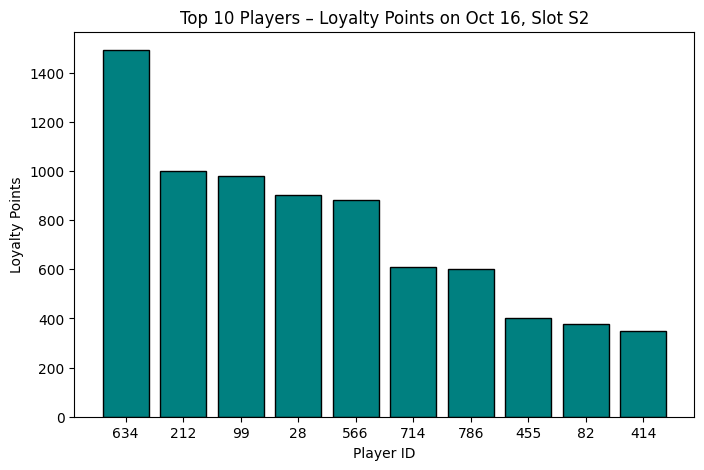

In [46]:
import matplotlib.pyplot as plt

# Sort top players
top_slot2 = merged_df.head(10)

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(top_slot2['User_Id'].astype(str), top_slot2['Loyalty_Points'], color='teal', edgecolor='black')

plt.title('Top 10 Players – Loyalty Points on Oct 16, Slot S2')
plt.xlabel('Player ID')
plt.ylabel('Loyalty Points')
plt.show()

### 📈 Loyalty Points – October 16, Slot S2

This chart shows the top 10 players based on Loyalty Points earned on 16th October, during Slot S2 (12 PM – 12 AM).


**c) 18th October 2022 – Slot S1 (12:00 AM to 12:00 PM)**.


In [47]:
# Define Slot Time Ranges

# For 18th Oct Slot S1 (12:00 AM to 12:00 PM)

slot1_start = pd.Timestamp('2022-10-18 00:00:00')
slot1_end = pd.Timestamp('2022-10-18 12:00:00')

In [48]:
s1_deposits_18 = deposit_df[(deposit_df['Datetime'] >= slot1_start) & (deposit_df['Datetime'] < slot1_end)]

s1_withdrawals_18 = withdrawal_df[(withdrawal_df['Datetime'] >= slot1_start) & (withdrawal_df['Datetime'] < slot1_end)]

s1_gameplay_18 = gameplay_df[(gameplay_df['Datetime'] >= slot1_start) & (gameplay_df['Datetime'] < slot1_end)]


In [49]:
# Grouping for 18th Oct S1

dep_18 = s1_deposits_18.groupby('User_Id').agg(
    total_deposit_amount=('Deposit_Amount', 'sum'),
    num_deposits=('Deposit_Amount', 'count')
).reset_index()

dep_18.head()

,User_Id,total_deposit_amount,num_deposits
0,11,4000,2
1,12,2011,1
2,14,1000,1
3,16,25000,4
4,24,500,1


In [50]:
with_18 = s1_withdrawals_18.groupby('User_Id').agg(
    total_withdrawal_amount=('Withdraw_Amount', 'sum'),
    num_withdrawals=('Withdraw_Amount', 'count')
).reset_index()

with_18.head()

,User_Id,total_withdrawal_amount,num_withdrawals
0,16,33949,2
1,31,3200,1
2,45,20000,2
3,47,1611,1
4,78,15000,1


In [51]:
game_18 = s1_gameplay_18.groupby('User_Id').size().reset_index(name='games_played')

game_18.head()

,User_Id,games_played
0,2,2
1,3,2
2,5,8
3,7,3
4,8,9


In [52]:
# Merge

merged = dep_18.merge(with_18, on='User_Id', how='outer')
merged_18 = merged.merge(game_18, on='User_Id', how='outer')
merged_18.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played
0,2,NaN,NaN,NaN,NaN,2.0
1,3,NaN,NaN,NaN,NaN,2.0
2,5,NaN,NaN,NaN,NaN,8.0
3,7,NaN,NaN,NaN,NaN,3.0
4,8,NaN,NaN,NaN,NaN,9.0


In [53]:
# Clean missing values
merged_18.fillna(0, inplace=True)
merged_18.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played
0,2,0.0,0.0,0.0,0.0,2.0
1,3,0.0,0.0,0.0,0.0,2.0
2,5,0.0,0.0,0.0,0.0,8.0
3,7,0.0,0.0,0.0,0.0,3.0
4,8,0.0,0.0,0.0,0.0,9.0


In [54]:
# Extra deposit actions
merged_18['extra_deposit_actions'] = (merged_18['num_deposits'] - merged_18['num_withdrawals']).clip(lower=0)
merged_18.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played,extra_deposit_actions
0,2,0.0,0.0,0.0,0.0,2.0,0.0
1,3,0.0,0.0,0.0,0.0,2.0,0.0
2,5,0.0,0.0,0.0,0.0,8.0,0.0
3,7,0.0,0.0,0.0,0.0,3.0,0.0
4,8,0.0,0.0,0.0,0.0,9.0,0.0


In [55]:
# Loyalty Points
merged_18['Loyalty_Points'] = (
    0.01 * merged_18['total_deposit_amount'] +
    0.005 * merged_18['total_withdrawal_amount'] +
    0.001 * merged_18['extra_deposit_actions'] +
    0.2 * merged_18['games_played']
)
merged_18.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played,extra_deposit_actions,Loyalty_Points
0,2,0.0,0.0,0.0,0.0,2.0,0.0,0.4
1,3,0.0,0.0,0.0,0.0,2.0,0.0,0.4
2,5,0.0,0.0,0.0,0.0,8.0,0.0,1.6
3,7,0.0,0.0,0.0,0.0,3.0,0.0,0.6
4,8,0.0,0.0,0.0,0.0,9.0,0.0,1.8


In [56]:
# Final output
merged_18 = merged_18.sort_values(by='Loyalty_Points', ascending=False)
merged_18.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played,extra_deposit_actions,Loyalty_Points
391,634,0.0,0.0,544620.0,2.0,0.0,0.0,2723.100
122,208,170000.0,1.0,0.0,0.0,7.0,1.0,1701.401
419,673,90000.0,1.0,0.0,0.0,4.0,1.0,900.801
92,162,12000.0,1.0,130000.0,1.0,0.0,0.0,770.000
147,245,0.0,0.0,150000.0,1.0,0.0,0.0,750.000


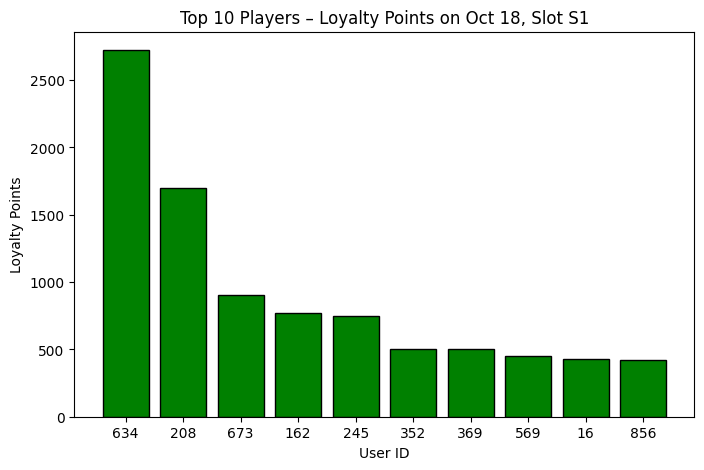

In [57]:
import matplotlib.pyplot as plt

# Sort top players
top_slot3 = merged_18.head(10)

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(top_slot3['User_Id'].astype(str), top_slot3['Loyalty_Points'], color='green', edgecolor='black')

plt.title('Top 10 Players – Loyalty Points on Oct 18, Slot S1')
plt.xlabel('User ID')
plt.ylabel('Loyalty Points')
plt.show()


### 📈 Loyalty Points – October 18, Slot S1

This chart shows the top 10 players based on Loyalty Points earned on 18th October, during Slot S1 (12 AM – 12 PM).


**d) 26th October 2022 – Slot S2 (12:00 PM to 11:59 PM)**.

In [58]:
# Define Slot Time Ranges

# For 26th Oct Slot S2 (12:00 PM to 11:59:59 PM)

slot2_start = pd.Timestamp('2022-10-26 12:00:00')
slot2_end = pd.Timestamp('2022-10-27 00:00:00')  # 12 AM next day


In [59]:
s2_deposits_26 = deposit_df[(deposit_df['Datetime'] >= slot2_start) & (deposit_df['Datetime'] < slot2_end)]

s2_withdrawals_26 = withdrawal_df[(withdrawal_df['Datetime'] >= slot2_start) & (withdrawal_df['Datetime'] < slot2_end)]

s2_gameplay_26 = gameplay_df[(gameplay_df['Datetime'] >= slot2_start) & (gameplay_df['Datetime'] < slot2_end)]

In [60]:
# Grouping for 26th Oct S2

dep_26 = s2_deposits_26.groupby('User_Id').agg(
    total_deposit_amount=('Deposit_Amount', 'sum'),
    num_deposits=('Deposit_Amount', 'count')
).reset_index()
dep_26.head()

,User_Id,total_deposit_amount,num_deposits
0,2,90000,2
1,5,1000,1
2,9,1000,1
3,10,1400,1
4,11,2000,1


In [61]:
with_26 = s2_withdrawals_26.groupby('User_Id').agg(
    total_withdrawal_amount=('Withdraw_Amount', 'sum'),
    num_withdrawals=('Withdraw_Amount', 'count')
).reset_index()
with_26.head()

,User_Id,total_withdrawal_amount,num_withdrawals
0,7,6617,1
1,9,20076,1
2,16,9999,1
3,44,500,1
4,50,1000,1


In [62]:
game_26 = s2_gameplay_26.groupby('User_Id').size().reset_index(name='games_played')
game_26.head()

,User_Id,games_played
0,5,4
1,6,1
2,7,1
3,8,7
4,9,44


In [63]:
# Merge

merged = dep_26.merge(with_26, on='User_Id', how='outer')
merged_26 = merged.merge(game_26,on='User_Id', how='outer')


In [64]:
# Clean missing values
merged_26.fillna(0, inplace=True)
merged_26.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played
0,2,90000.0,2.0,0.0,0.0,0.0
1,5,1000.0,1.0,0.0,0.0,4.0
2,6,0.0,0.0,0.0,0.0,1.0
3,7,0.0,0.0,6617.0,1.0,1.0
4,8,0.0,0.0,0.0,0.0,7.0


In [65]:
# Extra deposit actions

merged_26['extra_deposit_actions'] = (merged_26['num_deposits'] - merged_26['num_withdrawals']).clip(lower=0)
merged_26.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played,extra_deposit_actions
0,2,90000.0,2.0,0.0,0.0,0.0,2.0
1,5,1000.0,1.0,0.0,0.0,4.0,1.0
2,6,0.0,0.0,0.0,0.0,1.0,0.0
3,7,0.0,0.0,6617.0,1.0,1.0,0.0
4,8,0.0,0.0,0.0,0.0,7.0,0.0


In [66]:
# Loyalty Points
merged_26['Loyalty_Points'] = (
    0.01 * merged_26['total_deposit_amount'] +
    0.005 * merged_26['total_withdrawal_amount'] +
    0.001 * merged_26['extra_deposit_actions'] +
    0.2 * merged_26['games_played']
)
merged_26.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played,extra_deposit_actions,Loyalty_Points
0,2,90000.0,2.0,0.0,0.0,0.0,2.0,900.002
1,5,1000.0,1.0,0.0,0.0,4.0,1.0,10.801
2,6,0.0,0.0,0.0,0.0,1.0,0.0,0.200
3,7,0.0,0.0,6617.0,1.0,1.0,0.0,33.285
4,8,0.0,0.0,0.0,0.0,7.0,0.0,1.400


In [67]:
# Final output

merged_26 = merged_26.sort_values(by='Loyalty_Points', ascending=False)
merged_26

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played,extra_deposit_actions,Loyalty_Points
447,714,200000.0,1.0,0.0,0.0,0.0,1.0,2000.001
227,369,50000.0,1.0,200343.0,1.0,1.0,0.0,1501.915
393,634,10000.0,1.0,227362.0,1.0,1.0,0.0,1237.010
329,538,120000.0,3.0,0.0,0.0,2.0,3.0,1200.403
0,2,90000.0,2.0,0.0,0.0,0.0,2.0,900.002
...,...,...,...,...,...,...,...,...
581,928,0.0,0.0,0.0,0.0,1.0,0.0,0.200
624,995,0.0,0.0,0.0,0.0,1.0,0.0,0.200
10,15,0.0,0.0,0.0,0.0,1.0,0.0,0.200
2,6,0.0,0.0,0.0,0.0,1.0,0.0,0.200


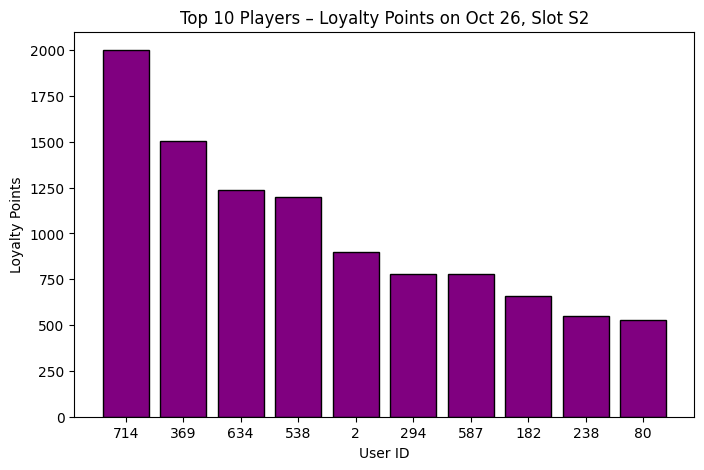

In [68]:
import matplotlib.pyplot as plt

# Sort top players
top_slot4 = merged_26.head(10)

plt.figure(figsize=(8, 5))
plt.bar(top_slot4['User_Id'].astype(str), top_slot4['Loyalty_Points'], color='purple', edgecolor='black')
plt.title('Top 10 Players – Loyalty Points on Oct 26, Slot S2')
plt.xlabel('User ID')
plt.ylabel('Loyalty Points')
plt.show()


### 📈 Loyalty Points – October 26, Slot S2

This chart shows the top 10 players based on Loyalty Points earned on 26th October, during Slot S2 (12 PM – 12 AM).

## 2. Calculate overall loyalty points earned and rank players on the basis of loyalty points in the month of October.
In case of tie, number of games played should be taken as the next criteria for ranking.


In [69]:
oct_start = pd.Timestamp('2022-10-01 00:00:00')
oct_end = pd.Timestamp('2022-10-31 23:59:59')

In [70]:
oct_deposits = deposit_df[(deposit_df['Datetime'] >= oct_start) & (deposit_df['Datetime'] <= oct_end)]

oct_withdrawals = withdrawal_df[(withdrawal_df['Datetime'] >= oct_start) & (withdrawal_df['Datetime'] <= oct_end)]

oct_gameplay = gameplay_df[(gameplay_df['Datetime'] >= oct_start) & (gameplay_df['Datetime'] <= oct_end)]


In [71]:
oct_dep = oct_deposits.groupby('User_Id').agg(
    total_deposit_amount=('Deposit_Amount', 'sum'),
    num_deposits=('Deposit_Amount', 'count')
).reset_index()

oct_dep.head()

,User_Id,total_deposit_amount,num_deposits
0,1,5000,1
1,2,342000,11
2,3,30000,3
3,5,55000,49
4,6,1300,3


In [72]:
oct_with = oct_withdrawals.groupby('User_Id').agg(
    total_withdrawal_amount=('Withdraw_Amount', 'sum'),
    num_withdrawals=('Withdraw_Amount', 'count')
).reset_index()

oct_with.head()

,User_Id,total_withdrawal_amount,num_withdrawals
0,2,898466,13
1,5,16200,5
2,7,6617,1
3,9,59216,4
4,11,71000,16


In [73]:
oct_game = oct_gameplay.groupby('User_Id').size().reset_index(name='games_played')
oct_game.head()

,User_Id,games_played
0,0,10
1,1,6
2,2,66
3,3,55
4,4,5


In [74]:
merged = oct_dep.merge(oct_with, on='User_Id', how='outer')
oct_merged = merged.merge(oct_game, on='User_Id', how='outer')
oct_merged.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played
0,0,NaN,NaN,NaN,NaN,10.0
1,1,5000.0,1.0,NaN,NaN,6.0
2,2,342000.0,11.0,898466.0,13.0,66.0
3,3,30000.0,3.0,NaN,NaN,55.0
4,4,NaN,NaN,NaN,NaN,5.0


In [75]:
#replace null values with 0
oct_merged.fillna(0, inplace=True)
oct_merged.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played
0,0,0.0,0.0,0.0,0.0,10.0
1,1,5000.0,1.0,0.0,0.0,6.0
2,2,342000.0,11.0,898466.0,13.0,66.0
3,3,30000.0,3.0,0.0,0.0,55.0
4,4,0.0,0.0,0.0,0.0,5.0


In [76]:
oct_merged['extra_deposit_actions'] = (oct_merged['num_deposits'] - oct_merged['num_withdrawals']).clip(lower=0)

oct_merged['Loyalty_Points'] = (
    0.01 * oct_merged['total_deposit_amount'] +
    0.005 * oct_merged['total_withdrawal_amount'] +
    0.001 * oct_merged['extra_deposit_actions'] +
    0.2 * oct_merged['games_played']
)

oct_merged.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played,extra_deposit_actions,Loyalty_Points
0,0,0.0,0.0,0.0,0.0,10.0,0.0,2.000
1,1,5000.0,1.0,0.0,0.0,6.0,1.0,51.201
2,2,342000.0,11.0,898466.0,13.0,66.0,0.0,7925.530
3,3,30000.0,3.0,0.0,0.0,55.0,3.0,311.003
4,4,0.0,0.0,0.0,0.0,5.0,0.0,1.000


In [77]:
oct_merged = oct_merged.sort_values(by=['Loyalty_Points', 'games_played'], ascending=[False, False])
oct_merged.head()

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played,extra_deposit_actions,Loyalty_Points
632,634,270000.0,5.0,11683352.0,50.0,22.0,0.0,61121.160
712,714,1479000.0,24.0,0.0,0.0,4.0,24.0,14790.824
210,212,1234986.0,18.0,319468.0,1.0,0.0,17.0,13947.217
670,672,1298700.0,25.0,50000.0,1.0,8.0,24.0,13238.624
97,99,817400.0,30.0,859025.0,7.0,4.0,23.0,12469.948


In [78]:
oct_merged

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played,extra_deposit_actions,Loyalty_Points
632,634,270000.0,5.0,11683352.0,50.0,22.0,0.0,61121.160
712,714,1479000.0,24.0,0.0,0.0,4.0,24.0,14790.824
210,212,1234986.0,18.0,319468.0,1.0,0.0,17.0,13947.217
670,672,1298700.0,25.0,50000.0,1.0,8.0,24.0,13238.624
97,99,817400.0,30.0,859025.0,7.0,4.0,23.0,12469.948
...,...,...,...,...,...,...,...,...
48,49,0.0,0.0,0.0,0.0,1.0,0.0,0.200
386,388,0.0,0.0,0.0,0.0,1.0,0.0,0.200
505,507,0.0,0.0,0.0,0.0,1.0,0.0,0.200
544,546,0.0,0.0,0.0,0.0,1.0,0.0,0.200


In [79]:
oct_merged['Rank'] = range(1, len(oct_merged) + 1)

# Preview top 10
oct_merged[['User_Id', 'Loyalty_Points', 'games_played', 'Rank']].head(10)


,User_Id,Loyalty_Points,games_played,Rank
632,634,61121.160,22.0,1
712,714,14790.824,4.0,2
210,212,13947.217,0.0,3
670,672,13238.624,8.0,4
97,99,12469.948,4.0,5
564,566,12121.382,106.0,6
367,369,11137.111,22.0,7
738,740,11006.886,2.0,8
30,30,10802.561,9.0,9
363,365,10389.775,2368.0,10


In [80]:
top10 = oct_merged[['User_Id', 'Loyalty_Points', 'games_played', 'Rank']].head(10)


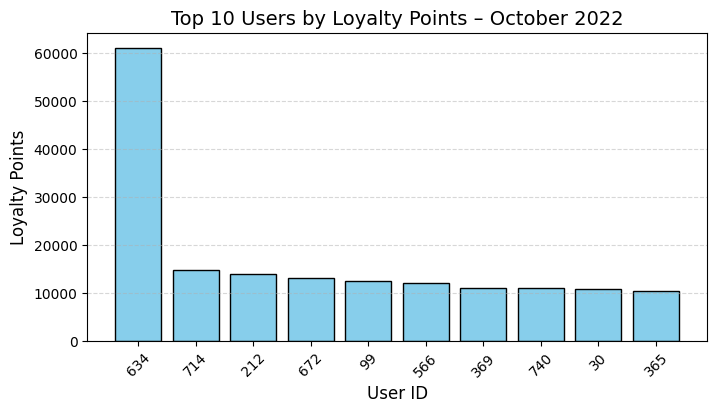

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(top10['User_Id'].astype(str), top10['Loyalty_Points'], color='skyblue', edgecolor='black')

plt.title('Top 10 Users by Loyalty Points – October 2022', fontsize=14)
plt.xlabel('User ID', fontsize=12)
plt.ylabel('Loyalty Points', fontsize=12)


plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


---

## 🥇 Q2 Summary: October Loyalty Points Leaderboard

After analyzing user activity during **October 2022**, players were ranked based on **Loyalty Points**, with **games played** used as a tie-breaker in case of equal scores.

### 🏆 Top 10 Players by Loyalty Points

| Rank | User ID | Loyalty Points | Games Played |
|------|---------|----------------|--------------|
| 1    | 634     | 61,121.16      | 22           |
| 2    | 714     | 14,790.82      | 4            |
| 3    | 212     | 13,947.22      | 0            |
| 4    | 672     | 13,238.62      | 8            |
| 5    | 99      | 12,469.95      | 4            |
| 6    | 566     | 12,121.38      | 106          |
| 7    | 369     | 11,137.11      | 22           |
| 8    | 740     | 11,006.89      | 2            |
| 9    | 30      | 10,802.56      | 9            |
| 10   | 365     | 10,389.78      | 2368         |


---


# 3. What is the average deposit amount?


In [82]:
deposit_df

,User_Id,Datetime,Deposit_Amount
0,357,2022-01-10 00:03:00,2000
1,776,2022-01-10 00:03:00,2500
2,492,2022-01-10 00:06:00,5000
3,803,2022-01-10 00:07:00,5000
4,875,2022-01-10 00:09:00,1500
...,...,...,...
17433,654,2022-10-31 23:57:00,1200
17434,980,2022-10-31 23:58:00,200
17435,2,2022-10-31 23:58:00,40000
17436,612,2022-10-31 23:58:00,2800


In [83]:
average_deposit = deposit_df['Deposit_Amount'].mean()

print(f"Average Deposit Amount: ₹{average_deposit:.2f}")


Average Deposit Amount: ₹5492.19


### 📊 Analysis – Average Deposit Amount

The average deposit amount across all transactions is **₹5492.19**.

The histogram below shows the distribution of deposit amounts, revealing how users typically deposit smaller amounts, with occasional large deposits increasing the overall average.


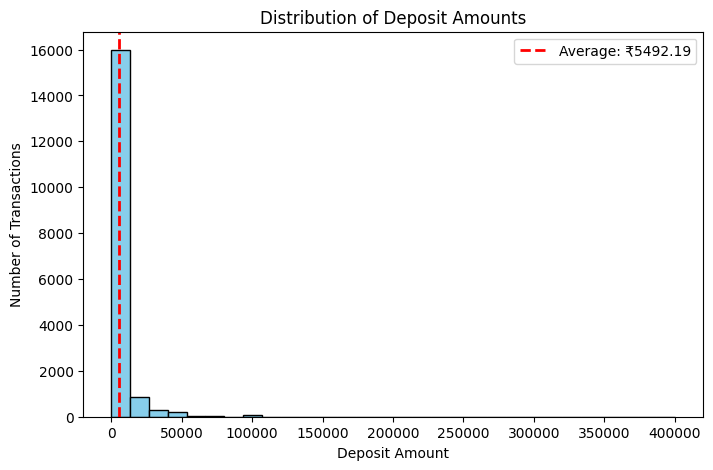

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(deposit_df['Deposit_Amount'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(average_deposit, color='red', linestyle='dashed', linewidth=2, label=f'Average: ₹{average_deposit:.2f}')

plt.title('Distribution of Deposit Amounts')
plt.xlabel('Deposit Amount')
plt.ylabel('Number of Transactions')
plt.legend()

plt.show()


# 4. What is the average deposit amount per user in a month?


In [85]:
# Filter only October deposits

october_deposits = deposit_df[(deposit_df['Datetime'].dt.month == 10) & (deposit_df['Datetime'].dt.year == 2022)]
october_deposits

,User_Id,Datetime,Deposit_Amount
5173,541,2022-10-10 00:04:00,6000
5174,897,2022-10-10 00:06:00,35000
5175,443,2022-10-10 00:12:00,1000
5176,409,2022-10-10 00:13:00,4000
5177,916,2022-10-10 00:14:00,2000
...,...,...,...
17433,654,2022-10-31 23:57:00,1200
17434,980,2022-10-31 23:58:00,200
17435,2,2022-10-31 23:58:00,40000
17436,612,2022-10-31 23:58:00,2800


In [86]:
#Group by Player and sum their deposits

user_total_october = october_deposits.groupby('User_Id')['Deposit_Amount'].sum().reset_index()
user_total_october

,User_Id,Deposit_Amount
0,1,5000
1,2,342000
2,3,30000
3,5,55000
4,6,1300
...,...,...
858,992,684988
859,995,34500
860,996,63700
861,998,6400


In [87]:
# Calculate the average across users

avg_deposit_per_user = user_total_october['Deposit_Amount'].mean()

#Print the result
print(f"Average Deposit Amount per User in October: ₹{avg_deposit_per_user:.2f}")


Average Deposit Amount per User in October: ₹72533.98


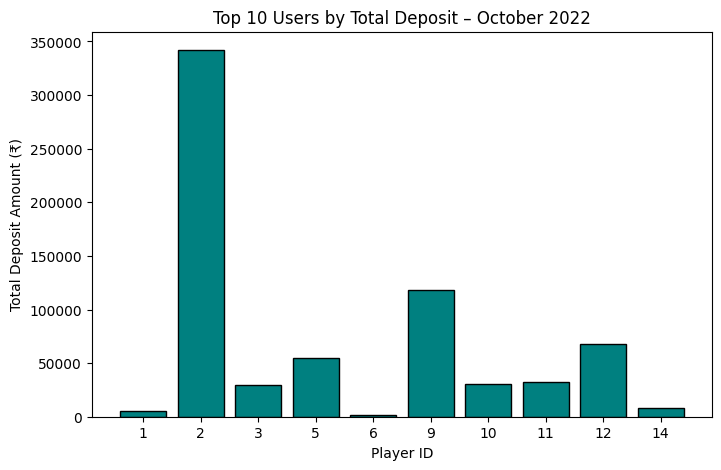

In [88]:
# Get top 10 users by deposit amount in October
top_users_october = user_total_october.head(10)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(top_users_october['User_Id'].astype(str), top_users_october['Deposit_Amount'], color='teal', edgecolor='black')

plt.title('Top 10 Users by Total Deposit – October 2022')
plt.xlabel('Player ID')
plt.ylabel('Total Deposit Amount (₹)')
plt.show()


### 💰 Total Deposit Amount – Top 10 Users in October

The chart displays the users with the highest cumulative deposits during October 2022. This helps identify the most financially engaged users on the platform.


# 5. What is the average number of games played per user?

In [89]:
gameplay_df

,User_Id,Games_Played,Datetime
0,851,1,2022-01-10 00:00:00
1,717,1,2022-01-10 00:00:00
2,456,1,2022-01-10 00:00:00
3,424,1,2022-01-10 00:00:00
4,845,1,2022-01-10 00:00:00
...,...,...,...
355261,658,1,2022-10-31 23:59:00
355262,582,1,2022-10-31 23:59:00
355263,272,1,2022-10-31 23:59:00
355264,563,1,2022-10-31 23:59:00


In [90]:
#Group by user and sum total games played

total_games_played = gameplay_df.groupby('User_Id')['Games_Played'].sum().reset_index()
total_games_played

,User_Id,Games_Played
0,0,15
1,1,8
2,2,97
3,3,80
4,4,5
...,...,...
995,995,18
996,996,474
997,997,109
998,998,4


In [91]:
# Calculate average games played per user

avg_games_per_user = total_games_played['Games_Played'].mean()

#Print result
print(f"Average number of games played per user: {avg_games_per_user:.2f}")


Average number of games played per user: 355.27


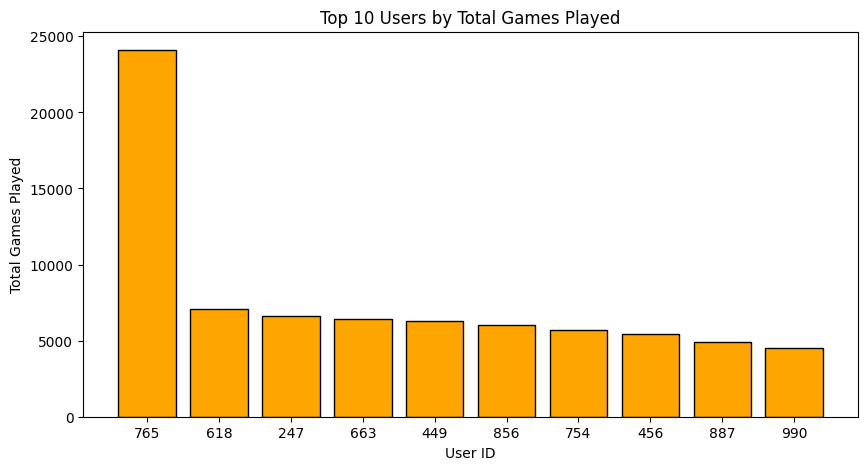

In [92]:
top_gamers = total_games_played.sort_values(by='Games_Played', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_gamers['User_Id'].astype(str), top_gamers['Games_Played'], color='orange', ec='black')

plt.title('Top 10 Users by Total Games Played')
plt.xlabel('User ID')
plt.ylabel('Total Games Played')
plt.show()


### 🏆 Part B: Bonus Allocation to Top 50 Loyal Players

The company has allocated a ₹50,000 bonus pool to reward the most loyal users in October.

To ensure fairness, we evaluated two options:
- **Loyalty Points**: A weighted metric based on deposits, withdrawals, and gameplay.
- **Games Played**: Shows how active a player was, but doesn’t reflect how much money they contributed.

✅ We chose to allocate the bonus **proportionally based on Loyalty Points**, as it reflects both financial and behavioral engagement.

The bonus for each of the top 50 users was calculated as:

**Bonus = (User's Loyalty Points / Total Loyalty Points of Top 50) × ₹50,000**


In [93]:
oct_merged

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played,extra_deposit_actions,Loyalty_Points,Rank
632,634,270000.0,5.0,11683352.0,50.0,22.0,0.0,61121.160,1
712,714,1479000.0,24.0,0.0,0.0,4.0,24.0,14790.824,2
210,212,1234986.0,18.0,319468.0,1.0,0.0,17.0,13947.217,3
670,672,1298700.0,25.0,50000.0,1.0,8.0,24.0,13238.624,4
97,99,817400.0,30.0,859025.0,7.0,4.0,23.0,12469.948,5
...,...,...,...,...,...,...,...,...,...
48,49,0.0,0.0,0.0,0.0,1.0,0.0,0.200,992
386,388,0.0,0.0,0.0,0.0,1.0,0.0,0.200,993
505,507,0.0,0.0,0.0,0.0,1.0,0.0,0.200,994
544,546,0.0,0.0,0.0,0.0,1.0,0.0,0.200,995


In [94]:
# Get top 50 users based on loyalty points
top_50 = oct_merged.sort_values(by=['Loyalty_Points', 'games_played'], ascending=[False, False]).head(50).copy()
top_50

,User_Id,total_deposit_amount,num_deposits,total_withdrawal_amount,num_withdrawals,games_played,extra_deposit_actions,Loyalty_Points,Rank
632,634,270000.0,5.0,11683352.0,50.0,22.0,0.0,61121.160,1
712,714,1479000.0,24.0,0.0,0.0,4.0,24.0,14790.824,2
210,212,1234986.0,18.0,319468.0,1.0,0.0,17.0,13947.217,3
670,672,1298700.0,25.0,50000.0,1.0,8.0,24.0,13238.624,4
97,99,817400.0,30.0,859025.0,7.0,4.0,23.0,12469.948,5
564,566,1209000.0,33.0,2030.0,1.0,106.0,32.0,12121.382,6
367,369,450000.0,9.0,1326542.0,8.0,22.0,1.0,11137.111,7
738,740,1058600.0,51.0,84088.0,5.0,2.0,46.0,11006.886,8
30,30,1004000.0,37.0,152145.0,1.0,9.0,36.0,10802.561,9
363,365,279000.0,7.0,1425235.0,24.0,2368.0,0.0,10389.775,10


In [95]:
# Calculate total loyalty points of top 50 users

total_loyalty_top_50 = top_50['Loyalty_Points'].sum()

# Assign bonus proportionally

bonus_pool = 50000
top_50['Bonus'] = ((top_50['Loyalty_Points'] / total_loyalty_top_50) * bonus_pool).round(2)

# Preview

top_50[['User_Id', 'Loyalty_Points', 'games_played', 'Bonus']].head()

,User_Id,Loyalty_Points,games_played,Bonus
632,634,61121.160,22.0,7240.97
712,714,14790.824,4.0,1752.25
210,212,13947.217,0.0,1652.31
670,672,13238.624,8.0,1568.37
97,99,12469.948,4.0,1477.30


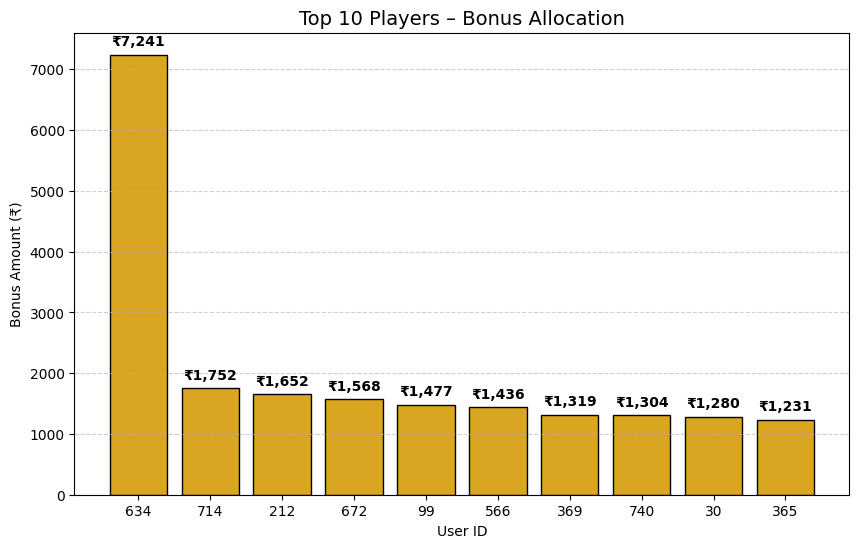

In [97]:
import matplotlib.pyplot as plt

# Plotting only top 10 for clarity
top_10_bonus = top_50.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_bonus['User_Id'].astype(str), top_10_bonus['Bonus'], color='goldenrod', edgecolor='black')

plt.title('Top 10 Players – Bonus Allocation', fontsize=14)
plt.xlabel('User ID')
plt.ylabel('Bonus Amount (₹)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate ₹ values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100, f"₹{height:,.0f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


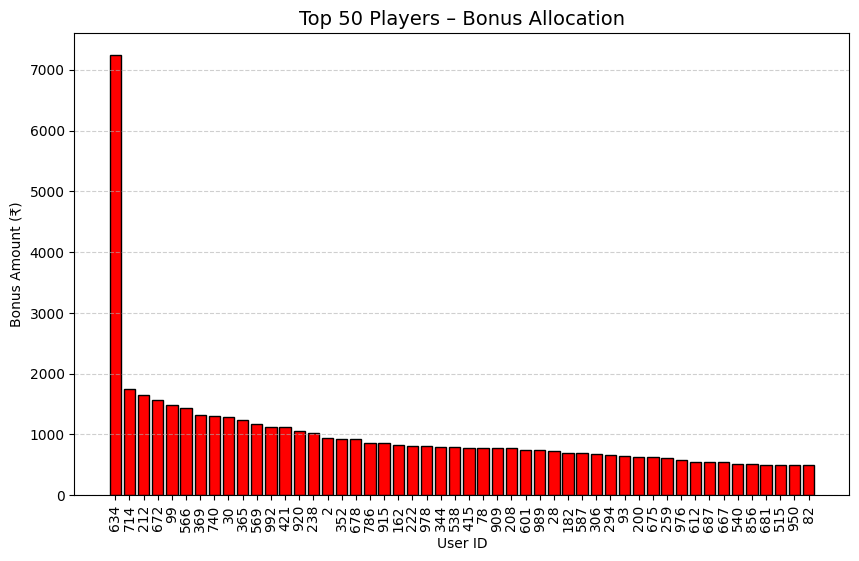

In [98]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
bars = plt.bar(top_50['User_Id'].astype(str), top_50['Bonus'], color='red', edgecolor='black')

plt.title('Top 50 Players – Bonus Allocation', fontsize=14)
plt.xlabel('User ID')
plt.ylabel('Bonus Amount (₹)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=90)
plt.show()

Each bar represents a player, and the height corresponds to their allocated bonus amount. User IDs are displayed along the x-axis for reference.

# Part C

### Would you say the loyalty point formula is fair or unfair?

 Can you suggest any way to make the loyalty point formula more robust?

**Evaluation of the Loyalty Points Formula:**

Right now, the formula gives a lot of importance to how many games a user plays. This can be unfair because someone playing hundreds of small-value games can earn more points than someone who deposits and plays fewer but bigger games.

Suggested Improvement:

---

### *Count the value of games, not just the number.*

Instead of just tracking how many games a user plays, we should also look at how much money is involved in those games. This way, players who actually spend more or play with higher stakes will get rewarded fairly — not just those who play more often.





